In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
d=pd.read_excel("data1.xlsx")
d

,U,R2,R2/R1,R,R_0,R.1,I,L,dxr,dx,fi,Unnamed: 11
0,1.2,10000,5000,10000,610,21408,2.262017e-08,142.5,3.25,3.05,0.022807,0.022803
1,1.2,10000,5000,9000,610,20408,2.497399e-08,142.5,3.50,3.30,0.024561,0.024556
2,1.2,10000,5000,8000,610,19408,2.787456e-08,142.5,3.85,3.65,0.027018,0.027011
3,1.2,10000,5000,7000,610,18408,3.153745e-08,142.5,4.25,4.05,0.029825,0.029816
4,1.2,10000,5000,6000,610,17408,3.630862e-08,142.5,4.58,4.38,0.032140,0.032129
5,1.2,10000,5000,5000,610,16408,4.278075e-08,142.5,5.50,5.30,0.038596,0.038577
6,1.2,10000,5000,4000,610,15408,5.206074e-08,142.5,6.10,5.90,0.042807,0.042781
7,1.2,10000,5000,3000,610,14408,6.648199e-08,142.5,8.20,8.00,0.057544,0.057480
8,1.2,10000,5000,2000,610,13408,9.195402e-08,142.5,11.10,10.90,0.077895,0.077738
9,1.2,10000,5000,1000,610,12408,1.490683e-07,142.5,17.60,17.40,0.123509,0.122886


In [54]:
def getkb(X,Y):
    k=(np.average(Y*X)-np.average(Y)*np.average(X))/(np.average(X*X)-np.average(X)**2)
    b=np.average(Y)-k*np.average(X)
    def av(n):
        return np.average(n)
    sigk=np.sqrt(np.abs((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k))/np.sqrt(X.shape[0])
    #print((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k)
    sigb=sigk*np.sqrt(av(X*X)-av(X)**2)
    return np.array([k,b,np.abs(sigk/k),np.abs(sigb/b)])

In [57]:
a,b,sa,sb=getkb(d['dx'][:]-0.4,d['I'][:])
a,b,sa,sb

(np.float64(8.771164632807784e-09),
 np.float64(2.462394473947504e-10),
 np.float64(0.011076097941832478),
 np.float64(1.6872825904728277))

In [8]:
0.2/145.2

0.0013774104683195595

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


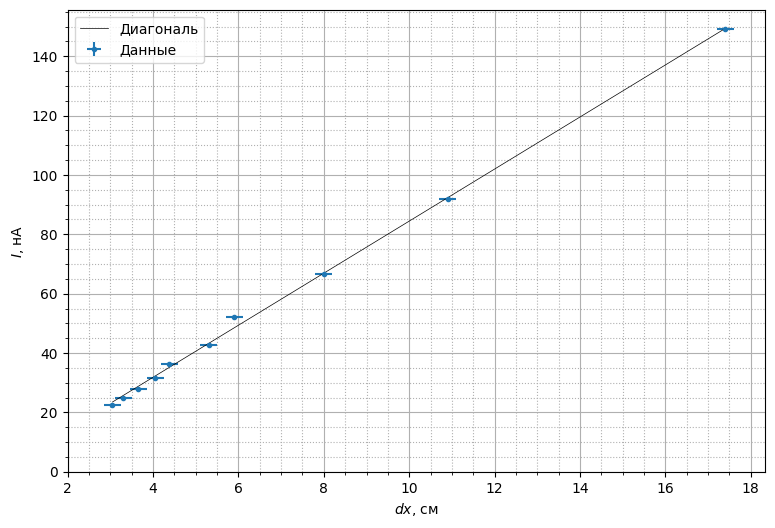

In [5]:
fig,ax = plt.subplots(figsize=(9,6))
ax.errorbar(d['dx'],d['I']*1e9,fmt='.', xerr=0.2, yerr=0, label="Данные")
ax.plot(d['dx'],(a*d['dx']+b)*1e9,'-', c='black',linewidth=0.5,label="Диагональ")
ax.minorticks_on()
ax.grid(which='major')
ax.grid(which='minor', linestyle=':')
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylim(ymin=plt.gca().get_yticks()[0])
ax.set_xlim(xmin=plt.gca().get_xticks()[0])
#ax.set_xticks([5,6,7,8,9,10])
ax.set_xlabel("$dx$, см")
ax.set_ylabel("$I$, нA")
ax.legend()
fig.savefig("ts.eps")

In [6]:
CI=2*1.425*(a/10)
CI

np.float64(2.4997819203502226e-09)

In [7]:
1/CI

np.float64(400034895.7879889)

In [20]:
0.1/3.3

0.030303030303030307

In [19]:
((0.2/14.4)**2+(0.2/12.4)**2)**0.5/(14.4/12.4)

0.01832866283984522

In [26]:
d=pd.read_excel("data1.xlsx",sheet_name=3)
d

,R,r1/r2,R_s,R0,thet
0,22000,0.005,22050,610,0.984071
1,32000,0.005,32050,610,0.714054
2,42000,0.005,42050,610,0.538997
3,39000,0.005,39050,610,0.559616
4,49000,0.010,49100,610,0.470004
5,56000,0.010,56100,610,0.417965
6,63000,0.100,64000,610,0.376478
7,70000,0.100,71000,610,0.339738
8,22000,0.005,22050,610,0.923671
9,29000,0.005,29050,610,0.725937


In [27]:
X=np.sqrt((np.pi/d['thet'])**2+1)
Y=d['R_s']+610

In [36]:
for i in zip(d['thet'], Y/X-610):
    print(*i,sep="	")

0.9840707469358974	6163.477014554547
0.714053865379259	6628.680573859685
0.5389965007326871	6603.687810858782
0.5596157879354227	6345.1998069701685
0.47000362924573547	6745.097990162436
0.41796527087239554	6868.9395069500515
0.37647757123491205	7077.634884264407
0.33973843440783386	7089.1670319166715
0.9236708391717776	5781.806192668033
0.7259370033829363	6067.665256621037


In [37]:
np.average((Y/X)-610),np.std((Y/X)-610)/np.average((Y/X)-610)

(np.float64(6537.135606882583), np.float64(0.06363376908772854))

In [78]:
a,b,sa,sb=getkb(X,Y)
a,b,sa,sb

(np.float64(8374.908471544362),
 np.float64(-6576.308538204074),
 np.float64(0.01741272331275205),
 np.float64(0.04296798885121955))

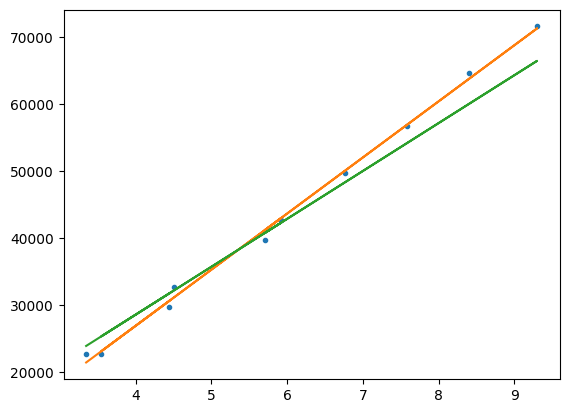

In [97]:
plt.plot(X,Y,'.')
plt.plot(X,a*X+b)
plt.plot(X,X*7147.1356)

In [40]:
20*np.exp(0.15/4-1)

np.float64(7.638736986078978)

In [43]:
d=pd.read_excel("data1.xlsx",sheet_name=4)
d

,R,x,20
0,4000,7.4,NaN
1,7310,10.8,NaN
2,15000,13.7,NaN
3,22000,15.9,NaN
4,30000,16.7,NaN
5,37000,17.2,NaN
6,44000,18.5,NaN


In [49]:
20*np.exp(0.149531734/4-1)

np.float64(7.63784279821634)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


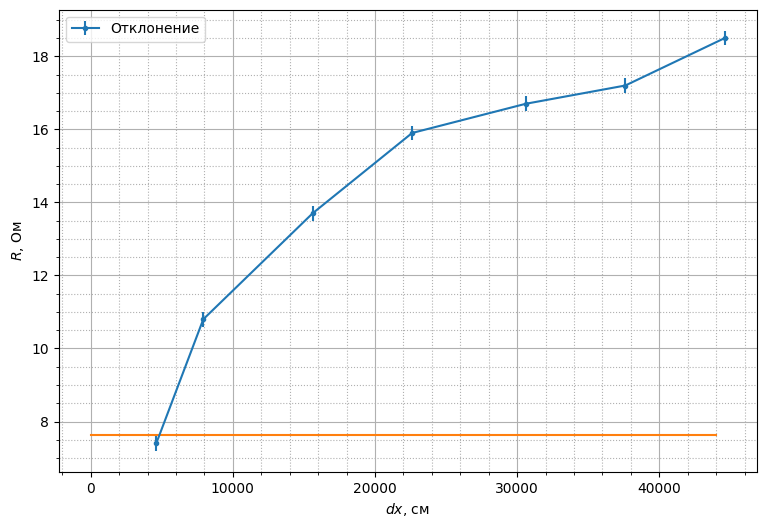

In [50]:
fig,ax = plt.subplots(figsize=(9,6))
ax.errorbar((d['R']+610),d['x'],fmt='.-', yerr=0.2,label="Отклонение")
ax.plot([0,44000],[7.63]*2)
ax.minorticks_on()
ax.grid(which='major')
ax.grid(which='minor', linestyle=':')
ax.set_xlabel("$dx$, см")
ax.set_ylabel("$R$, Ом")
ax.legend()
fig.savefig("R.eps")

In [41]:
4000+(7300-4000)*(7.62-7.4)/(10.8-7.4)

4213.529411764705

In [109]:
1e6/209-610

4174.688995215311

In [52]:
4174.6*2e-6

0.008349200000000001

In [51]:
2*142.5*2e-6*1.2/(70*7.62)

1.2823397075365578e-06

#### 